In [1]:
# Import necessary libraries
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and CSV file I/O
import tensorflow as tf  # For creating the machine learning model
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For data visualization
import re, string  # For data cleaning
from sklearn.preprocessing import LabelEncoder  # For data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix  # For model evaluation
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets

Loading the dataset through a github repository.

---



In [2]:
# Function to load the dataset from a URL
def load_dataset(url):
    df = pd.read_csv(url)
    return df

In [9]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\study\coursera\Suicide_Ideation_Dataset(Twitter-based).csv")

Exploring the dataset

---
1. Dataset Shape


In [10]:
df.shape

(1787, 2)

2. Dataset Preview

In [ ]:
df.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


3. Checking for empty rows

In [ ]:
# Check for and display the number of missing values in the dataset
df.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

4. Distribution of label values

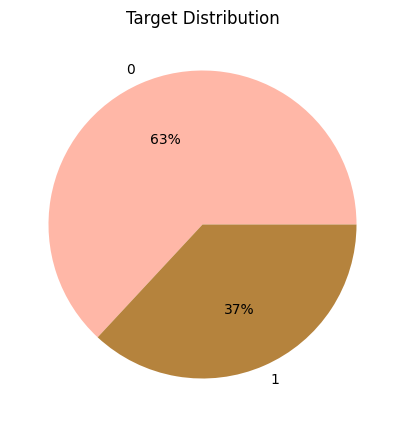

In [ ]:
# Display the distribution of the 'Suicide' column
df['Suicide'].value_counts()

#Create a pie chart to visualize the target distribution
plt.figure(figsize=(9, 5))
palette = ['#ffb7a7', '#b5833d']
df["Suicide"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=palette)
plt.ylabel("")
plt.title("Target Distribution")
plt.show()

Cleaning the dataset

---

1. Removing the empty rows

In [ ]:
df = df.dropna() # As number of empty rows is quite small we can simply remove them
# Check for and display the number of missing values again
df.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

2. Text Cleaning using cleaner() funtion

*   Convert the tweets to lower case
*   Remove mentions and urls
*   Remove special characters
*   Remove hashtags but keep the text
*   Remove digits
*   Remove non alphanumeric chars
*   Remove single chars
*   Remove punctuations








In [ ]:
def cleaner(raw):

    # convert to lower case
    processed_sent = str(raw).lower()

    # remove user mentions & urls
    processed_sent = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", processed_sent)

    # remove special chars
    processed_sent = re.sub(r'\W', ' ', str(processed_sent))

    # remove single characters from the start
    processed_sent = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sent)

    # remove hashtags but keep the text
    processed_sent = processed_sent.replace("#", "").replace("_", " ")

    # remove digits
    processed_sent = re.sub(r'\d+', '', str(processed_sent))

    # remove non alphanumeric chars
    processed_sent = ' '.join(e for e in processed_sent.split(' ') if e.isalnum())
    processed_sent = re.sub(r'[^A-Za-z0-9]+', ' ', str(processed_sent))

    # remove single chars
    processed_sent = re.sub(r'\s+[a-zA-Z]\s+', ' ', str(processed_sent))

    # remove punctuations
    punct = list(string.punctuation)
    special_punct=['©', '^', '®',' ','¾', '¡','!']
    punct.extend(special_punct)
    for p in punct:
        if p in processed_sent:
            processed_sent = processed_sent.replace(p, ' ')

    return processed_sent.lower()

# apply the function
df['Tweet'] = df['Tweet'].apply(lambda x: cleaner(x))

# view
df.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,you want his money,Not Suicide post
2,that crap took me forever to put together m go...,Potential Suicide post
3,kiwitweets hey jer since when did you start tw...,Not Suicide post
4,trying out quot delicious library quot with mi...,Not Suicide post


Processing the Dataset

---

1. Label **Encoding**

In [ ]:
# Encode the 'Suicide' column using LabelEncoder
lab_e = LabelEncoder()
df['Suicide'] = lab_e.fit_transform(df['Suicide'])
df.head()

,Tweet,Suicide
0,making some lunch,0
1,you want his money,0
2,that crap took me forever to put together m go...,1
3,kiwitweets hey jer since when did you start tw...,0
4,trying out quot delicious library quot with mi...,0


2. Vectorizing Text Data

In [ ]:
# Vectorize the text data using TF-IDF vectorization with a maximum of 2000 features
vector = TfidfVectorizer(max_features=2000)
X = vector.fit_transform(df['Tweet'])
Y = df.Suicide
X = X.toarray()
vector.get_feature_names_out()

array(['able', 'about', 'absolutely', ..., 'yummy', 'zoloft', 'zone'],
      dtype=object)

3. Train and Test split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=26)

Model Defintion

---
We will be using a simple neural network model made using Tensorflow's Keras API.


In [ ]:
# Create a sequential neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, Y_train, epochs=5, batch_size=32)

model.summary()

Epoch 1/5
42/42 [==============================] - 1s 6ms/step - loss: 0.6397 - accuracy: 0.6390
Epoch 2/5
42/42 [==============================] - 0s 6ms/step - loss: 0.3366 - accuracy: 0.8946
Epoch 3/5
42/42 [==============================] - 0s 6ms/step - loss: 0.1123 - accuracy: 0.9701
Epoch 4/5
42/42 [==============================] - 0s 7ms/step - loss: 0.0495 - accuracy: 0.9895
Epoch 5/5
42/42 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9948
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               256128    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                               

Model Evaluation

---



In [ ]:
# Make predictions on the test data
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred)

# Calculate and display the accuracy score
score = accuracy_score(Y_pred, Y_test)
print(f"Test Score: {score:.2f}")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
prec = tp/(tp+fp)
rec = tp/(tp+fn)
f1  = 2*prec*rec*1/(prec+rec)
print(f"Precision : {prec:.2f} ")
print(f"Recall : {rec:.2f} ")
print(f"F1 score : {f1:.2f} ")

14/14 [==============================] - 0s 8ms/step
Test Score: 0.92
Precision : 0.93 
Recall : 0.86 
F1 score : 0.89 


Visualising the Results

---



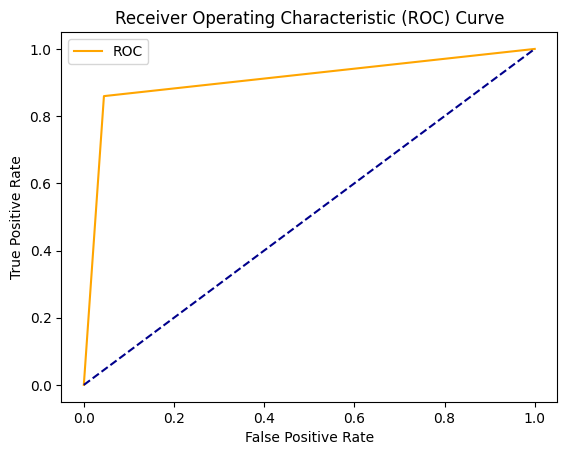

Precision : %.2f  0.9272727272727272
Recall : %.2f 0.8595505617977528
F1 score: %.2f 0.892128279883382


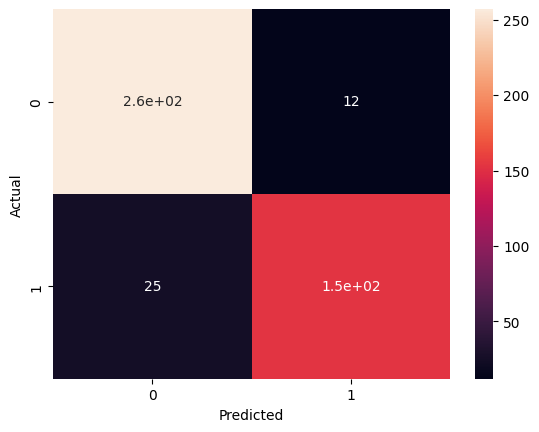

In [ ]:
# Define a function to plot the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plot_roc_curve(fpr, tpr)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()